In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Arun\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
stock=pd.read_csv(r"C:\Users\Arun\Desktop\sap_stock.csv")

In [3]:
stock.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [5]:
data=pd.DataFrame(stock[['Date','Close']])

In [6]:
data.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2550 non-null   object 
 1   Close   2550 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.0+ KB


In [8]:
data['Date'] = pd.to_datetime(data['Date'],yearfirst=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2550 non-null   datetime64[ns]
 1   Close   2550 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.0 KB


In [10]:
print(data.isnull().sum())

Date     0
Close    0
dtype: int64


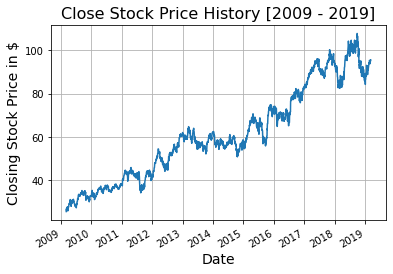

In [11]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.grid(True)
# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()


## Model Creation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(data, test_size=0.20)

In [16]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [17]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [18]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.02775731997611926
Intercept:  25.651494332380523


C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


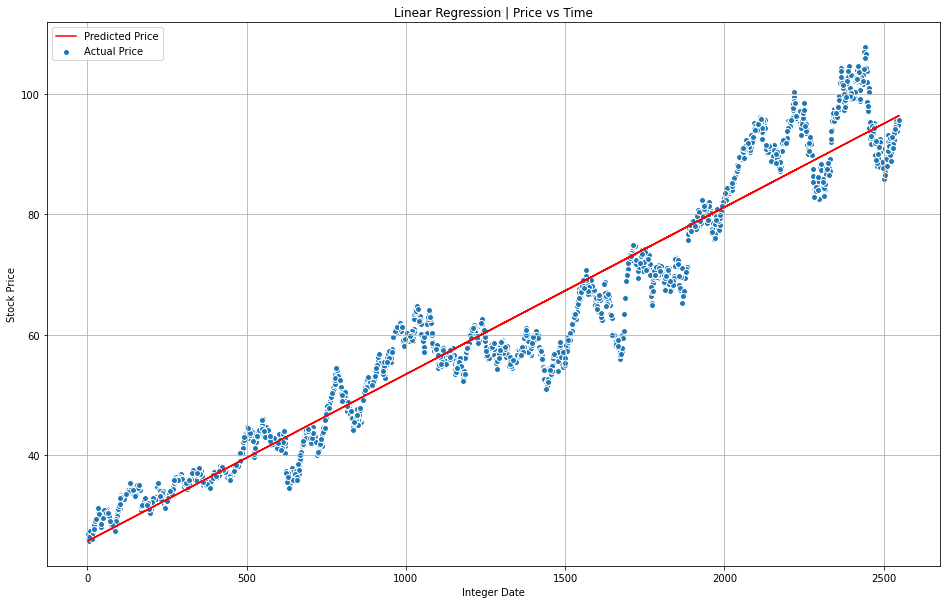

In [19]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [21]:
# Generate array with predicted values
y_pred = model.predict(X_test)

## Regression Evaluation
#### Let's have a look at how the predicted values compare with the actual value 

## Error Evaluation Metrics
#### Mean Absolute Error (MAE) is the mean of the absolute value of the errors:$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

#### Mean Squared Error (MSE) is the mean of the squared errors:$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

#### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors: $$ \sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2} $$

#### All of these are cost functions we want to minimize.

In [ ]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [ ]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The MAE is 3% (of minimum) and 6% (of maximum) of the Closing Price.

The other two errors are larger, because the errors are squared and have therefore a greater influence on the result.

## Accuracy Evaluation Metrics
##### To see how accurate our model is, we can calculate the Coefficient of determination, which describes the ratio between the total error and the error, that is explained by our model. It's value is between 0 and 1, with 1 meaning 100% of the error is accounted by the model.

### Coefficient of determination$$
R^2 = 1 - \frac{RSS}{TSS}
$$

#### with

### Residual Sum of Squares (RSS)$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

### Total Sum of Squares (TSS)$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$

In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

The value of $R^2$ shows that are model accounts for nearly 94% of the differences between the actual stock prices and the predicted prices.